<a href="https://colab.research.google.com/github/Vatsal-Patel-09/Machine_Learning_101/blob/main/LAB_10_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload Kaggle.json to load API

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vatsalpatel09","key":"5aa080a79bc54096796e86a0fbf65f12"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Load dataset from kaggle API (URL = "https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset")

!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
License(s): unknown
  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 44.5MB/s]


In [6]:
# STEP 4: Unzip the dataset
!unzip loan-prediction-problem-dataset.zip -d data/


Archive:  loan-prediction-problem-dataset.zip
  inflating: data/test_Y3wMUE5_7gLdaTN.csv  
  inflating: data/train_u6lujuX_CVtuZ9i.csv  


In [7]:
# STEP 5: Load the data into pandas
import pandas as pd

train_df = pd.read_csv("data/train_u6lujuX_CVtuZ9i.csv")
test_df = pd.read_csv("data/test_Y3wMUE5_7gLdaTN.csv")

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (614, 13)
Test data shape: (367, 12)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [8]:
# Evaluation Function
def evaluate_model(model, X_train, X_val, y_train, y_val):
    """
    Train the model and evaluate it on validation data.
    """
    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_val)

    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print("📊 Model Evaluation Metrics:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    return y_pred

In [10]:
# VISUALIZATION FUNCTION
def visualize_results(model, X_val, y_val, y_pred):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title("Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # ROC Curve
    if len(set(y_val)) == 2:  # Only for binary classification
        y_proba = model.predict_proba(X_val)[:,1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        auc = roc_auc_score(y_val, y_proba)

        axes[1].plot(fpr, tpr, label=f"AUC = {auc:.3f}")
        axes[1].plot([0,1], [0,1], linestyle='--', color='gray')
        axes[1].set_title("ROC Curve")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend()

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4)
    plt.show()

In [11]:
train_df = train_df.dropna(subset=['Loan_Status'])
le = LabelEncoder()
train_df['Loan_Status'] = le.fit_transform(train_df['Loan_Status'])

X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

# Convert categorical to numeric
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Fill missing numeric values
X = X.fillna(X.median())

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train & Evaluate Support Vector Classifier
svc_model = SVC(probability=True, random_state=42)


In [14]:
y_pred = evaluate_model(svc_model, X_train, X_val, y_train, y_val)


📊 Model Evaluation Metrics:
Accuracy : 0.6504
Precision: 0.6504
Recall   : 1.0000
F1 Score : 0.7882


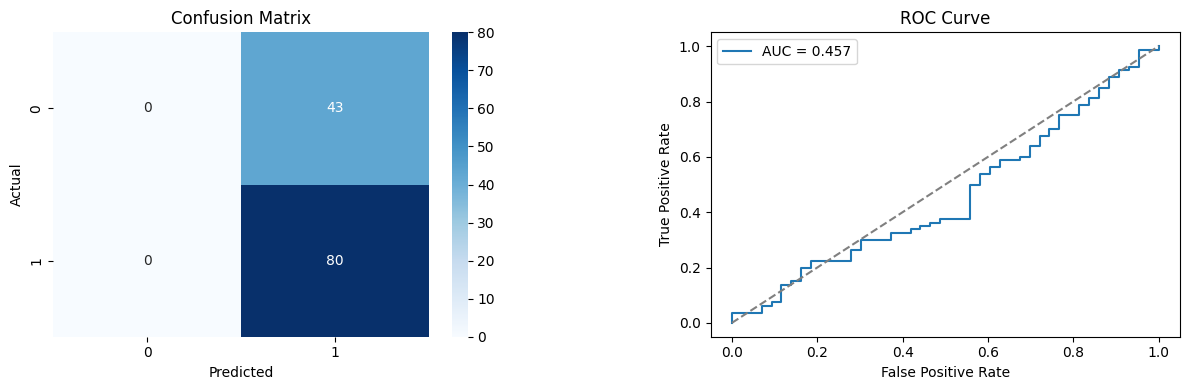

In [15]:
visualize_results(svc_model, X_val, y_val, y_pred)
